In [1]:
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
# lista 

mylista = [3.15,2.35,6.89,4.52,3.32]
print(mylista)

[3.15, 2.35, 6.89, 4.52, 3.32]


In [3]:
print(mylista[1], mylista[-3], mylista[:])

(2.35, 6.89, [3.15, 2.35, 6.89, 4.52, 3.32])


In [4]:
print(mylista[0:2], mylista[:2])

([3.15, 2.35], [3.15, 2.35])


In [5]:
print(mylista[2:])

[6.89, 4.52, 3.32]


In [6]:
mylista.insert(2, 5.693)
mylista.append(5.23)
print(mylista, mylista.index(3.32))

([3.15, 2.35, 5.693, 6.89, 4.52, 3.32, 5.23], 5)


In [7]:
file = 'data/lectura1.dat'
data = np.loadtxt(file, comments='#')

In [8]:
print(data)

[[  1.    1.    0.9]
 [  2.    2.2   7.8]
 [  3.    2.5  27.5]
 [  4.    4.4  67. ]
 [  5.    6.  130. ]]


In [9]:
tiempo = data[:,0]
x = data[:,1]
y = data[:,2]
print(tiempo)

tiempo1 = [1,2,3,4,5,6]
x1 = [1,2,3.5,5.6,6.7,7.8]



[1. 2. 3. 4. 5.]


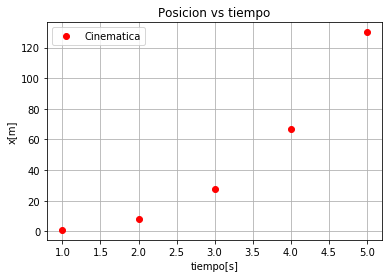

In [10]:
plt.plot(tiempo, y, 'ro', label='Cinematica')
plt.title("Posicion vs tiempo")
plt.xlabel('tiempo[s]')
plt.ylabel('x[m]')
plt.grid()
plt.legend()

plt.savefig('Fig1.pdf')
plt.show()

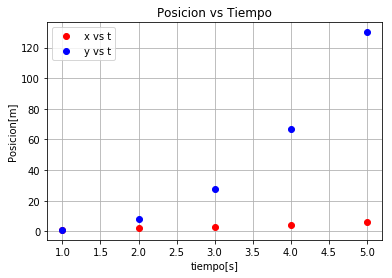

In [11]:
fig, ax = plt.subplots()
p1 = ax.plot(tiempo, x, 'ro', linewidth=2, label='x vs t')
p2 = ax.plot(tiempo, y, 'bo', linewidth=2, label='y vs t')
ax.set(xlabel = 'tiempo[s]', 
       ylabel = 'Posicion[m]', 
       title='Posicion vs Tiempo')
ax.grid()
ax.legend()

#plt.xlim(2.,3.)

plt.show()
fig.savefig('Fig2.pdf')

In [12]:
def Funcion(t, N0_, alpha_):
    return N0_*np.exp(-t*alpha)

In [13]:
N0 = 1000.
alpha = 0.8

t = np.linspace(0.1, 2., 100)
y = np.zeros(len(t))
#print(t, y)

In [14]:
for i in range(len(t)):
    y[i] = Funcion(t[i], N0, alpha)


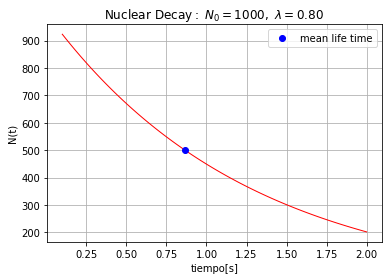

In [15]:
fig, ax = plt.subplots()
p1 = ax.plot(t, y, 'r', linewidth=1, label='')
p2 = ax.plot(np.log(2)/alpha, 0.5*N0, 'bo', linewidth=2, label='mean life time')
ax.set(xlabel = 'tiempo[s]', 
       ylabel = 'N(t)', 
       title ='$\mathrm{Nuclear \ Decay:} \ N_{0}=%.0f, \ \lambda=%.2f $' %(N0, alpha))

ax.grid()
ax.legend()

#plt.xlim(2.,3.)

plt.show()
fig.savefig('Decay.pdf')

In [34]:
#!ls *.pdf 
filenames = []
mean_ = []

In [46]:
def createFig(alpha_, it):
    
    t = np.linspace(0.01, 10., 50)
    y_ = np.zeros(len(t))
    
    for i in range(len(t)):
        y_[i] = Funcion(t[i], N0, alpha_)
    
    mean = np.log(2)/alpha_
    mean_.append(mean)
    
    fig, ax = plt.subplots()
    p1 = ax.plot(t, y_, 'b', linewidth=1, label='')
    p2 = ax.plot(mean, 0.5*N0, 'ro', linewidth=1, label='mean life time')
    
    ax.set(xlabel = 'tiempo[s]', 
           ylabel = 'N(t)', 
           title ='$\mathrm{Nuclear \ Decay: %.0f} \ N_{0}=%.0f, \ \lambda=%.2f \ \mu=%.3f$' %(it, N0, alpha_, mean))
    ax.grid()
    ax.legend()
    
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

In [47]:
alphatest = np.linspace(0.1,1.0,100)


num_fig = 0
for i in alphatest:
    #print(i)
    createFig(i, num_fig)
    num_fig += 1

In [32]:
#!ls Figures/
!convert Figures/* -loop 0 -delay 20 decay.gif 

In [42]:
tmp = []

for i in range(len(mean_)):
    tmp.append([alphatest[i], mean_[i]])

Atowrite = np.array(tmp)

np.savetxt('MisDatos.dat', Atowrite, 
           fmt='%.11e', 
           delimiter=' ', 
           newline='\n' )

In [43]:
!cat MisDatos.dat 

1.00000000000e-01 6.93147180560e+00
1.09090909091e-01 6.35384915513e+00
1.18181818182e-01 5.86509152781e+00
1.27272727273e-01 5.44615641869e+00
1.36363636364e-01 5.08307932411e+00
1.45454545455e-01 4.76538686635e+00
1.54545454545e-01 4.48506999186e+00
1.63636363636e-01 4.23589943676e+00
1.72727272727e-01 4.01295736114e+00
1.81818181818e-01 3.81230949308e+00
1.90909090909e-01 3.63077094579e+00
2.00000000000e-01 3.46573590280e+00
2.09090909091e-01 3.31505173311e+00
2.18181818182e-01 3.17692457757e+00
2.27272727273e-01 3.04984759446e+00
2.36363636364e-01 2.93254576391e+00
2.45454545455e-01 2.82393295784e+00
2.54545454545e-01 2.72307820934e+00
2.63636363636e-01 2.62917896074e+00
2.72727272727e-01 2.54153966205e+00
2.81818181818e-01 2.45955451166e+00
2.90909090909e-01 2.38269343317e+00
3.00000000000e-01 2.31049060187e+00
3.09090909091e-01 2.24253499593e+00
3.18181818182e-01 2.17846256747e+00
3.27272727273e-01 2.11794971838e+00
3.36363636364e-01 2.06070783410e+00
3.45454545455e-01 2.00647868